In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Dataset\Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.shape

(2200, 8)

In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

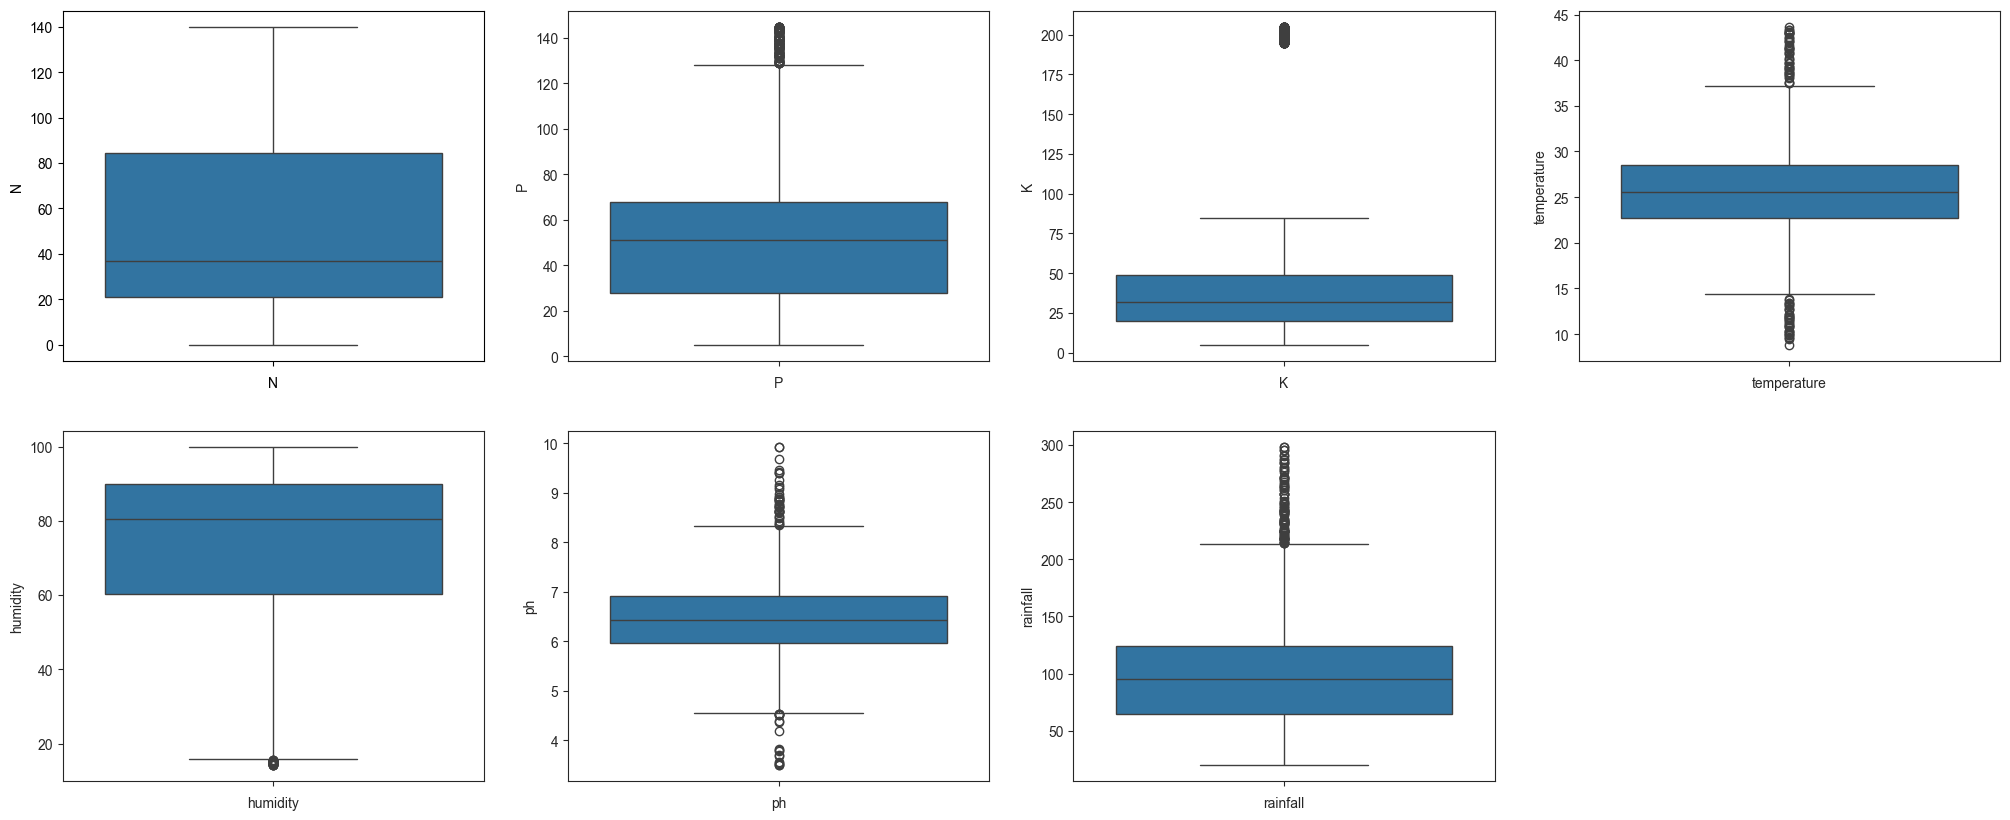

In [5]:
col = [column for column in df.columns if column!='label']
plt.figure(figsize=(25, 10))

for i in range(len(col)):
        plt.subplot(2,4,i+1)
        sns.set_style('ticks')
        plt.xlabel(col[i])
        ax = sns.boxplot(df[col[i]])

In [ ]:
df_clean = df.copy()

num_cols = df.select_dtypes(include='number').columns

# Remove outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

In [9]:
def detect_outliers(col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    print('\n ----', col , '----')
    print("Q1: ",Q1)
    print("Q3: ",Q3)
    iqr = Q3 - Q1
    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col] = upper_limit
    df.loc[(df[col]<lower_limit), col] = lower_limit    
    return df

In [10]:
outliers = ['P','K','temperature','humidity','ph','rainfall']

In [11]:
for col in outliers:
    detect_outliers(col)


 ---- P ----
Q1:  28.0
Q3:  68.0
Upper limit 128.0
Lower limit -32.0

 ---- K ----
Q1:  20.0
Q3:  49.0
Upper limit 92.5
Lower limit -23.5

 ---- temperature ----
Q1:  22.7693746325
Q3:  28.5616539325
Upper limit 37.2500728825
Lower limit 14.080955682499999

 ---- humidity ----
Q1:  60.2619528025
Q3:  89.948770755
Upper limit 134.47899768374998
Lower limit 15.731725873750001

 ---- ph ----
Q1:  5.97169279925
Q3:  6.923642621250002
Upper limit 8.351567354250005
Lower limit 4.543768066249998

 ---- rainfall ----
Q1:  64.55168599999999
Q3:  124.2675078
Upper limit 213.84124050000003
Lower limit -25.022046700000033


C:\Users\Azhar\AppData\Local\Temp\ipykernel_22024\2075053422.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '92.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col]>upper_limit), col] = upper_limit


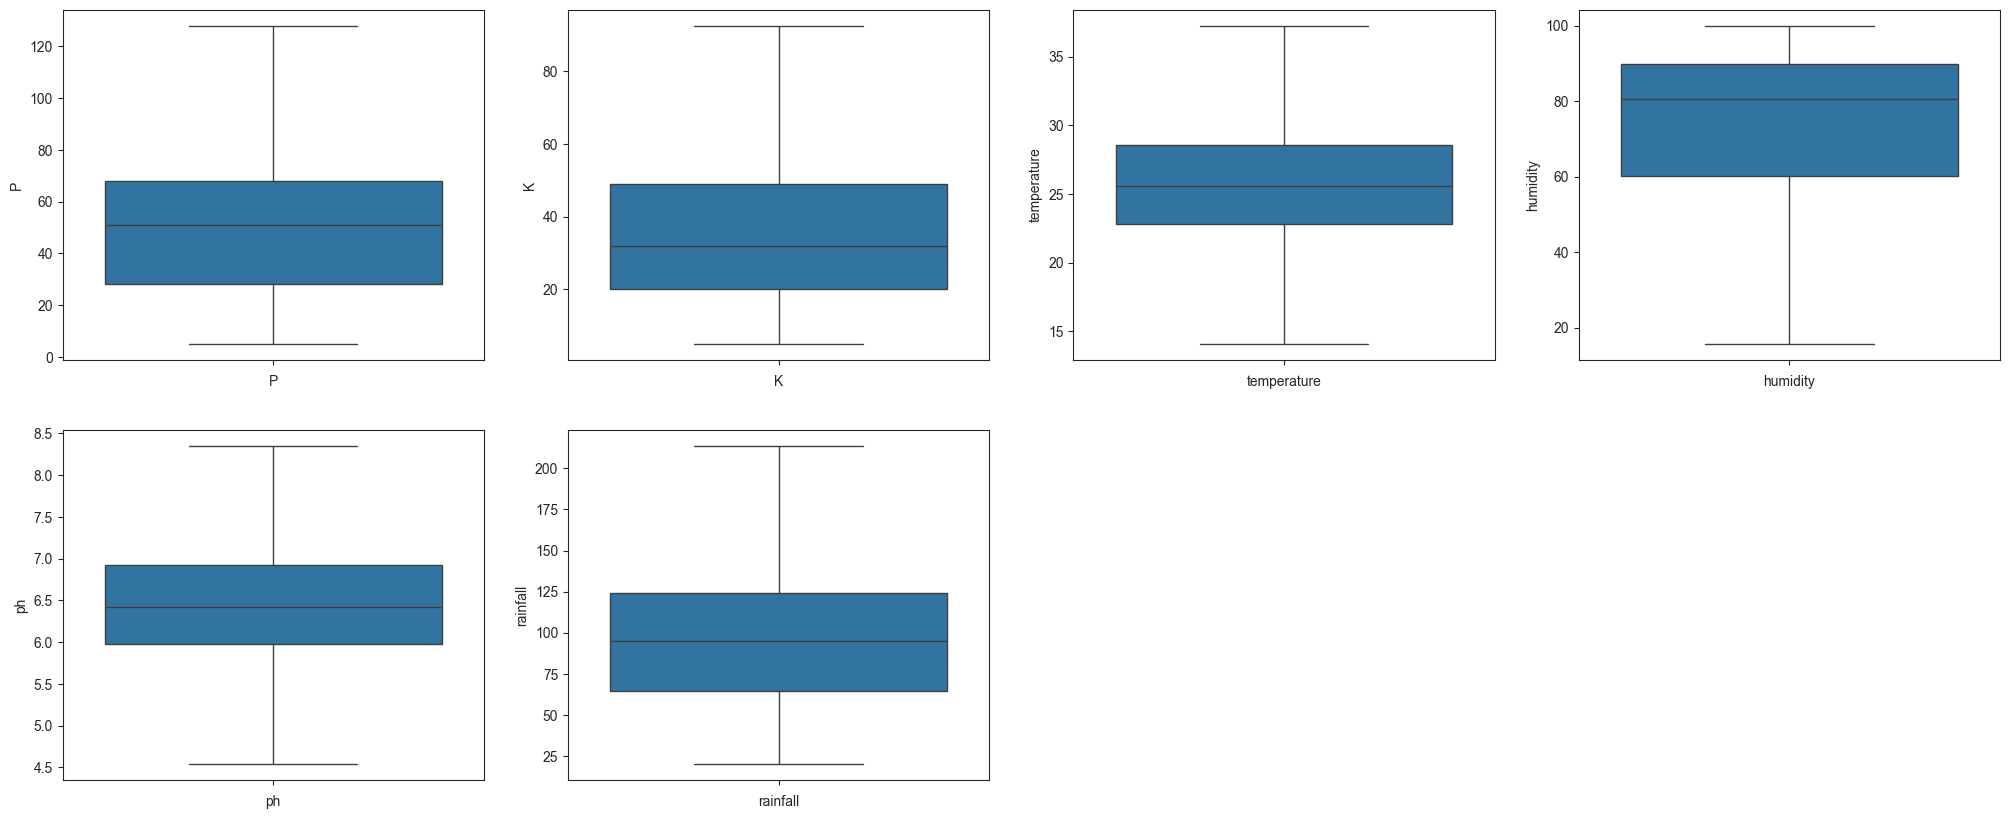

In [12]:
col = ['P','K','temperature','humidity','ph','rainfall']
plt.figure(figsize=(25, 10))

for i in range(len(col)):
        plt.subplot(2,4,i+1)
        sns.set_style('ticks')
        plt.xlabel(col[i])
        ax = sns.boxplot(df[col[i]])

In [14]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier()

In [17]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [19]:
predictions = model.predict(X_test)

In [20]:
accuracy = model.score(X_test, Y_test)

In [21]:
print(accuracy)

0.9931818181818182


In [26]:
import pickle

In [27]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)